In [1]:
import pandas as pd # To load data, we use the package pandas
import numpy as np # To do mathematical operations, we use the package numpy
import matplotlib.pyplot as plt # To plot the returns data, we use the package matplotlib

# Load the monthly data of IBM, from 01/1934 to 12/2011

ibmnames = ['var1', 'time', 'var3', 'return'] # Give variables' names
df = pd.read_fwf('IBM.dat', colspecs='infer', widths=None, header=None, names=ibmnames) 

# To calculate the mean of the stock returns, we can use the function np.mean

mu = np.mean(df['return'])

print('This is the IBM mean: {}\n' .format(mu))

This is the IBM mean: 0.0128621420940171



In [2]:
# We can also use a loop to compute the mean

T = len(df) # Get the number of obs 

mu1 = 0 # The initial value of the mean

for i in range(T):
    mu1 = df['return'][i] + mu1
mu1 = mu1 / T

print('This is the mean computed by a loop: {}\n' .format(mu1))

This is the mean computed by a loop: 0.0128621420940171



In [3]:
sig = np.var(df['return']) # The square of the standard deviation

std = np.sqrt(sig) # The standard deviation

print('(Monthly) Mean, Std of the Returns \n')
print('        {0:.4f}   {1:.4f}\n '.format(mu, std))

(Monthly) Mean, Std of the Returns 

        0.0129   0.0652
 


In [4]:
# Q1: How many returns greater than 2*std+mu?

LB = mu + 2 * std

A1 = 0

for i in range(T):
    if df['return'][i] > LB:
        A1 = A1 + 1

print('Q1: How many returns greater than 2*std+mu?\n')
print('          {}\n'.format(A1))

Q1: How many returns greater than 2*std+mu?

          26



In [5]:
# Q2: How many returns greater than 10%?

LB2 = .10  

A2 = 0

for i in range(T):
    if df['return'][i] > LB2:
         A2 = A2 + 1
            
print('Q2: How many returns greater than 10%?\n')
print('          {}\n'.format(A2))        

Q2: How many returns greater than 10%?

          73



In [6]:
# Q3: What is the accumulative returns / value of investing $1?

Value = 1

for i in range(T):
    Value = Value * (1 + df['return'][i])

print('Q3: What is the accumulative returns / value of investing $1?\n')
print('          {0:.2f}\n'.format(Value))   

Q3: What is the accumulative returns / value of investing $1?

          22557.17



In [7]:
# Q4: What is the accumulative returns/Value of investing $1 if we miss 5% of the best return month?
# Assuming earning the average riskfree rate of 4%/12 in those missing month                        
                        
ReturnS = sorted(df['return']) # Sort the returns in increasing order

T1 = .05 * T
T1 = round(T1) #round the number to an integer

Value1 = 1

for i in range(T-T1):
    Value1 = Value1 * (1 + ReturnS[i])

for i in range(T - T1 + 1, T):
    Value1 = Value1 * (1 + 0.04/12)

print('Q4: What is the accumulative returns/Value of investing $1 if we miss 5% of the best return month?\n')
print('          {0:.2f}\n'.format(Value1))

Q4: What is the accumulative returns/Value of investing $1 if we miss 5% of the best return month?

          22.47



In [8]:
# Q5: What is the accumulative returns / value of investing $1 if we avoid 5% of the worse return month?
# Assuming earning the average riskfree rate of 4%/12 in those missing month                        
                        
Value2 = 1

for i in range(T1):
    Value2 = Value2 * (1 + 0.04/12)

for i in range(T1+1, T):
    Value2 = Value2 * (1 + ReturnS[i])

print('Q5: What is the accumulative returns / value of investing $1 if we avoid 5% of the worse return month?\n')
print('          {0:.2f}\n'.format(Value2))

Q5: What is the accumulative returns / value of investing $1 if we avoid 5% of the worse return month?

          17270749.40



In [9]:
# Q6: What is the percentage of up days?

Up = 0
for i in range(T):
    if df['return'][i] > 0: 
        Up = Up + 1

Udays = Up/T * 100

print('Q6: What is the percentage of up days?\n')
print('          {0:.2f}%\n'.format(Udays))

Q6: What is the percentage of up days?

          56.62%



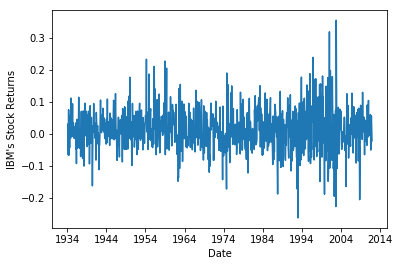

In [10]:
# Plot the returns of IBM

df.time = pd.to_datetime(df['time'], format='%Y%m%d')
df.set_index(['time'],inplace=True)

plt.plot(df.index, df['return'])
plt.ylabel('IBM\'s Stock Returns')
plt.xlabel('Date')
plt.show()